In [ ]:
# Instalación de la biblioteca necesaria
!pip install google-cloud-bigquery

In [ ]:

# Importación de bibliotecas
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Autenticación
auth.authenticate_user()

# Conexión a BigQuery
project_id = 'ultimate-realm-388922'
client = bigquery.Client(project=project_id)


## Distribución de demanda de viajes por mes

In [ ]:

# Consulta a BigQuery
query = """
        SELECT
            COUNT(*) AS cantidad_viajes,
            EXTRACT(YEAR FROM tpep_pickup_datetime) AS year,
            EXTRACT(MONTH FROM tpep_pickup_datetime) AS month
        FROM
            `ultimate-realm-388922.taxis_nyc.yellow_tripdata`
        WHERE
            EXTRACT(YEAR FROM tpep_pickup_datetime) = 2023
        GROUP BY
            EXTRACT(YEAR FROM tpep_pickup_datetime),
            EXTRACT(MONTH FROM tpep_pickup_datetime);
        """

df = client.query(query).to_dataframe()

# Visualización de los primeros registros
df

# Análisis Exploratorio de Datos (EDA)


,cantidad_viajes,year,month
0,3485032,2023,10
1,2817024,2023,9
2,3258128,2023,4
3,13,2023,11
4,2889126,2023,2
5,3275643,2023,6
6,2875764,2023,7
7,2792723,2023,8
8,3481409,2023,5
9,3373850,2023,3


In [ ]:
# Conversión de los números de mes a nombres en español
meses = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre'
}




In [ ]:
# Aplica la conversión a la columna 'month' y especifica el orden de los meses
df['month'] = pd.Categorical(df['month'].map(meses), categories=meses.values(), ordered=True)

In [ ]:
df

,cantidad_viajes,year,month
0,2889126,2023,febrero
1,3373850,2023,marzo
2,3041571,2023,enero
3,2792723,2023,agosto
4,2875764,2023,julio
5,2817024,2023,septiembre
6,3485032,2023,octubre
7,3258128,2023,abril
8,3275643,2023,junio
9,3481409,2023,mayo


In [ ]:
# Agrupa los datos por mes y suma la cantidad de viajes
viajes_por_mes = df.groupby('month')['cantidad_viajes'].sum()

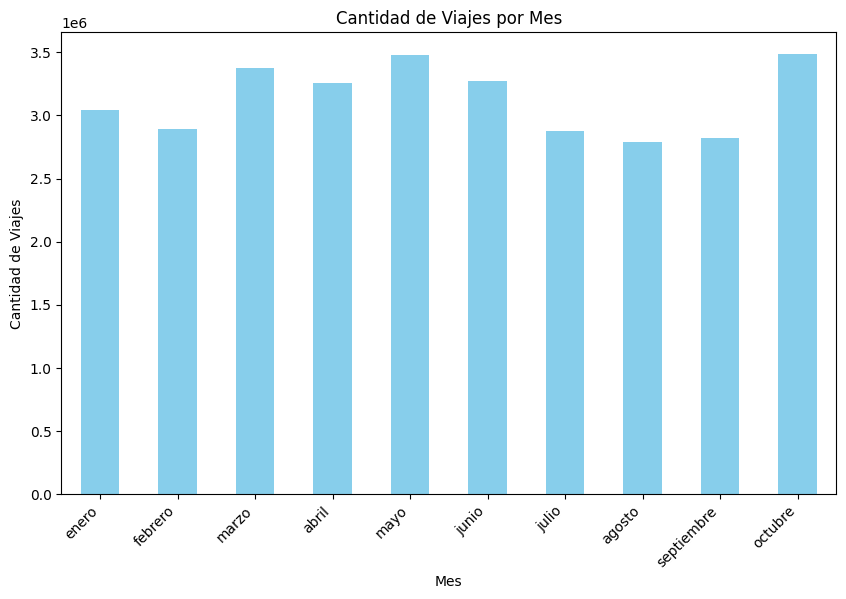

In [ ]:
# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
viajes_por_mes.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Viajes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

## Relación de demanda entre horarios y días de la semana

In [ ]:
#mostrar primeras filas
# Consulta a BigQuery
query1 = """
       SELECT *
      FROM
       `ultimate-realm-388922.taxis_nyc.yellow_tripdata`
      ;
        """

df1 = client.query(query1).to_dataframe()

# Visualización de los primeros registros
df1



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-10-22 11:42:30+00:00,2023-10-22 11:56:43+00:00,2,3.52,1,N,234,236,1,17.7,0.0,0.5,4.34,0.0,1.0,26.04,2.5,0.0
1,2,2023-10-22 16:25:16+00:00,2023-10-22 16:42:34+00:00,1,2.88,1,N,142,234,1,17.7,0.0,0.5,5.42,0.0,1.0,27.12,2.5,0.0
2,2,2023-10-23 15:33:55+00:00,2023-10-23 15:53:04+00:00,1,2.26,1,N,68,158,1,17.7,0.0,0.5,4.34,0.0,1.0,26.04,2.5,0.0
3,2,2023-10-24 10:50:20+00:00,2023-10-24 11:07:17+00:00,1,2.56,1,N,143,236,1,17.7,0.0,0.5,3.26,0.0,1.0,24.96,2.5,0.0
4,2,2023-10-25 14:09:13+00:00,2023-10-25 14:29:57+00:00,1,1.36,1,N,107,162,1,17.7,0.0,0.5,4.34,0.0,1.0,26.04,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31290371,2,2023-01-16 00:24:04+00:00,2023-01-16 00:37:24+00:00,1,3.85,1,N,249,65,1,19.1,1.0,0.5,4.82,0.0,1.0,28.92,2.5,0.0
31290372,1,2023-01-21 01:01:20+00:00,2023-01-21 01:13:44+00:00,1,4.10,1,N,107,87,1,19.1,3.5,0.5,4.80,0.0,1.0,28.90,2.5,0.0
31290373,2,2023-01-21 12:11:22+00:00,2023-01-21 12:29:29+00:00,1,3.10,1,N,264,264,1,19.1,0.0,0.5,5.78,0.0,1.0,28.88,2.5,0.0
31290374,1,2023-01-21 17:58:48+00:00,2023-01-21 18:17:23+00:00,0,3.10,1,N,79,161,1,19.1,2.5,0.5,4.60,0.0,1.0,27.70,2.5,0.0


In [ ]:
df1.head(50)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-10-21 02:43:06+00:00,2023-10-21 02:55:04+00:00,1,3.70,1,N,114,181,1,17.7,3.5,0.5,6.00,0.0,1.0,28.70,2.5,0.0
1,1,2023-10-21 10:37:00+00:00,2023-10-21 10:55:09+00:00,3,2.60,1,N,161,158,1,17.7,2.5,0.5,4.30,0.0,1.0,26.00,2.5,0.0
2,1,2023-10-23 09:52:25+00:00,2023-10-23 10:08:56+00:00,1,2.70,1,N,151,163,1,17.7,2.5,0.5,3.26,0.0,1.0,24.96,2.5,0.0
3,2,2023-10-23 16:08:33+00:00,2023-10-23 16:26:50+00:00,1,2.20,1,N,237,236,1,17.7,2.5,0.5,3.63,0.0,1.0,27.83,2.5,0.0
4,1,2023-10-23 18:38:00+00:00,2023-10-23 18:57:06+00:00,1,2.50,1,Y,246,144,1,17.7,5.0,0.5,4.80,0.0,1.0,29.00,2.5,0.0
5,2,2023-10-24 07:40:27+00:00,2023-10-24 07:58:29+00:00,1,2.25,1,N,151,237,1,17.7,0.0,0.5,4.34,0.0,1.0,26.04,2.5,0.0
6,1,2023-10-26 13:17:54+00:00,2023-10-26 13:36:03+00:00,1,2.30,1,N,140,238,1,17.7,2.5,0.5,4.30,0.0,1.0,26.00,2.5,0.0
7,1,2023-10-26 21:26:18+00:00,2023-10-26 21:46:01+00:00,1,2.70,1,N,90,87,1,17.7,3.5,0.5,4.55,0.0,1.0,27.25,2.5,0.0
8,2,2023-10-27 02:11:11+00:00,2023-10-27 02:26:38+00:00,1,3.39,1,N,144,50,1,17.7,1.0,0.5,4.54,0.0,1.0,27.24,2.5,0.0
9,2,2023-10-27 09:41:27+00:00,2023-10-27 10:01:07+00:00,1,1.97,1,N,237,239,1,17.7,0.0,0.5,4.34,0.0,1.0,26.04,2.5,0.0


### Diccionario de Datos

VendorID: ID del proveedor.

tpep_pickup_datetime: Fecha y hora de recogida.

tpep_dropoff_datetime: Fecha y hora de bajada.

passenger_count: Cantidad de pasajeros.

trip_distance: Distancia del viaje.

RatecodeID: Tipo de tarifa.

store_and_fwd_flag: Bandera para indicar si el viaje fue almacenado en memoria antes de enviar al servidor.

PULocationID: ID de la ubicación de recogida.

DOLocationID: ID de la ubicación de bajada.

Datos de pago y montos.


In [ ]:
#creo una copia del df1 de bigquery
df2 =  df1
df2.count()

VendorID                 31290376
tpep_pickup_datetime     31290376
tpep_dropoff_datetime    31290376
passenger_count          31290376
trip_distance            31290376
RatecodeID               31290376
store_and_fwd_flag       31290376
PULocationID             31290376
DOLocationID             31290376
payment_type             31290376
fare_amount              31290376
extra                    31290376
mta_tax                  31290376
tip_amount               31290376
tolls_amount             31290376
improvement_surcharge    31290376
total_amount             31290376
congestion_surcharge     31290376
Airport_fee              31290376
dtype: int64

En la lista anterior se pueden ver todos los nombres de las columnas del dataset y la cantidad de registros en cada una.

Es necsario confirmar que las columnas de dia y hora de recogida y llegada esten en el formato correcto: datetime

In [ ]:
# Asegúrate de que 'tpep_pickup_datetime' es del tipo datetime
print(f"Antes de la conversión:\n{df2['tpep_pickup_datetime'].dtype}")

Antes de la conversión:
datetime64[ns, UTC]


Una vez chequeado puedo agregar dos nuevas columnas, una que me indique qué día de la semana es y otra la hora.

In [ ]:
# Convertir las columnas de fecha y hora al formato datetime
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])
df2['tpep_dropoff_datetime'] = pd.to_datetime(df2['tpep_dropoff_datetime'])

# Agregar columnas para el día de la semana y la hora del día
df2['day_of_week'] = df2['tpep_pickup_datetime'].dt.day_name()
df2['hour_of_day'] = df2['tpep_pickup_datetime'].dt.hour


Estas dos nuevas columnas se agregaron al final de la tabla


In [ ]:
df2.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,day_of_week,hour_of_day
0,1,2023-10-21 02:43:06+00:00,2023-10-21 02:55:04+00:00,1,3.7,1,N,114,181,1,...,3.5,0.5,6.00,0.0,1.0,28.70,2.5,0.0,Saturday,2
1,1,2023-10-21 10:37:00+00:00,2023-10-21 10:55:09+00:00,3,2.6,1,N,161,158,1,...,2.5,0.5,4.30,0.0,1.0,26.00,2.5,0.0,Saturday,10
2,1,2023-10-23 09:52:25+00:00,2023-10-23 10:08:56+00:00,1,2.7,1,N,151,163,1,...,2.5,0.5,3.26,0.0,1.0,24.96,2.5,0.0,Monday,9
3,2,2023-10-23 16:08:33+00:00,2023-10-23 16:26:50+00:00,1,2.2,1,N,237,236,1,...,2.5,0.5,3.63,0.0,1.0,27.83,2.5,0.0,Monday,16
4,1,2023-10-23 18:38:00+00:00,2023-10-23 18:57:06+00:00,1,2.5,1,Y,246,144,1,...,5.0,0.5,4.80,0.0,1.0,29.00,2.5,0.0,Monday,18


Se porcede a agrupar la cantidad de viajes por día de la semana y hora del día, para poder hacer una comparación y saber cómo es la demanda. La idea es responder preguntas como: ¿Cuál es el horario y día de la semana con más viajes de taxis amarillos?, ¿Existe algún patrón claro de demanda?, ¿Hay horarios pico?, etc.

In [ ]:
# Agrupa por día de la semana y hora del día, y cuenta la cantidad de registros
variacion_por_dia = df2.groupby(['day_of_week', 'hour_of_day']).size().reset_index(name='num_viajes')

# Muestra el resultado
print(variacion_por_dia)

    day_of_week  hour_of_day  num_viajes
0        Friday            0      134139
1        Friday            1       77267
2        Friday            2       44504
3        Friday            3       26228
4        Friday            4       21525
..          ...          ...         ...
163   Wednesday           19      319436
164   Wednesday           20      290935
165   Wednesday           21      295217
166   Wednesday           22      262586
167   Wednesday           23      176579

[168 rows x 3 columns]


Para poder responder a las preguntas, es más sencillo mirar esto en una gráfica. Se utiliza heatmap.
En primer lugar se ordenan los días de la semana para una rápida visualización. Luego se determinan los parametros, día de la semana y hora del día como index y columnas y se le solicita que los valores de las celdas sea el número total de viajes.

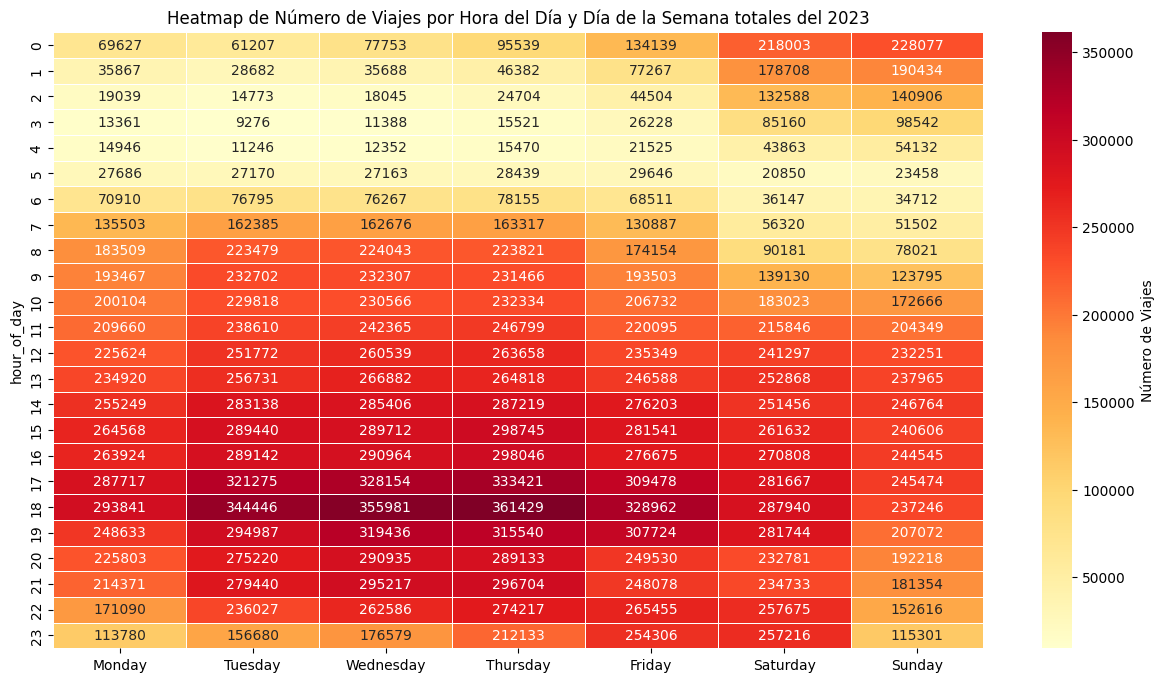

In [ ]:
# Define el orden personalizado de los días de la semana
orden_dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Crea un pivot table para preparar los datos para el heatmap
heatmap_data = variacion_por_dia.pivot_table(values='num_viajes', index='day_of_week', columns='hour_of_day', fill_value=0)

# Reordena las categorías de los días de la semana
heatmap_data.index = pd.Categorical(heatmap_data.index, categories=orden_dias_semana, ordered=True)
heatmap_data.sort_index(inplace=True)

# Intercambia filas y columnas (dar vuelta a index y columns)
heatmap_data = heatmap_data.transpose()

# Crea el heatmap utilizando Seaborn con un mapa de colores de amarillo a rojo y tamaño 15x8
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Número de Viajes'})
plt.title('Heatmap de Número de Viajes por Hora del Día y Día de la Semana totales del 2023')
plt.show()

### Patrones de movilidad en la ciudad de Nueva York basados en el gráfico heatmap para el año 2023:

#### Movimiento durante los días de semana (lunes a viernes):

* Hay actividad en la ciudad desde las 8:00 hasta las 22:00.
* La demanda tiende a bajar por la noche.

#### Mayor cantidad de viajes entre martes y viernes por la tarde (17:00 a 19:00):

* Durante esos días de la semana, se observa un pico de actividad entre las 17:00 y las 19:00 horas.
* Esto sugiere una alta demanda de taxis durante esas horas, posiblemente debido a la salida de las personas del trabajo.

#### Demanda de taxis el viernes y sábado por la noche:

* Se observa una demanda significativa de taxis en la noche del viernes y el sábado.
* Esto podría indicar que las personas salen durante el fin de semana y utilizan taxis para desplazarse.









## Analisis de la distancia de los viajes

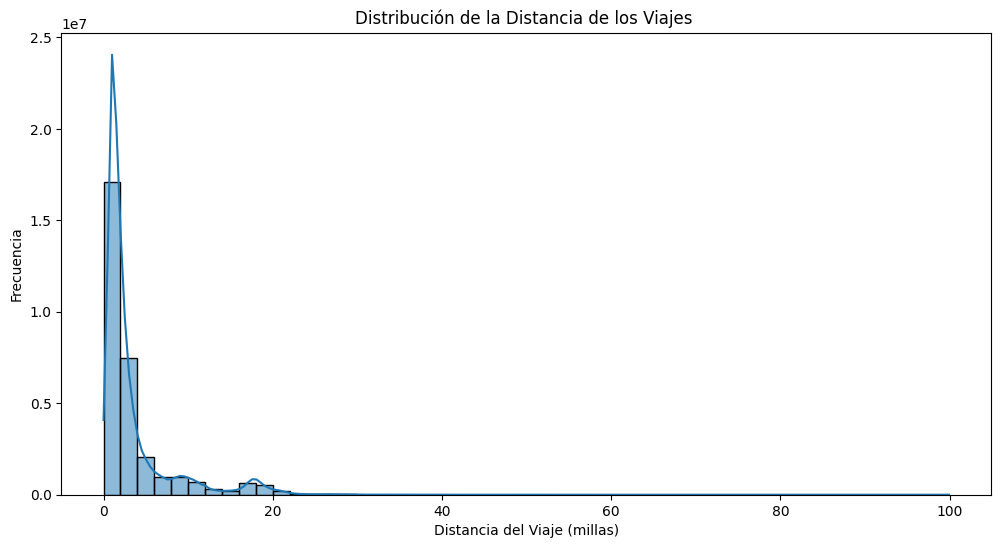

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df2['trip_distance'], bins=50, kde=True)  # Ajusta el número de bins si es necesario
plt.title('Distribución de la Distancia de los Viajes ')
plt.xlabel('Distancia del Viaje (millas)')
plt.ylabel('Frecuencia')
plt.show()

Los viajes se encuentran entre 1 a 22 millas, por ello se procede a retirar valores extremos

Para trabajar los outlayers, y para que la memoria ram de Colab pueda procesarlo, tomo directamente desde Bigquery una consulta de una muestra de 200.000 registros al azar entre 0.01 millas a 30 millas como distancia de viajes.

In [ ]:


# Query para obtener la columna trip_distance de una muestra aleatoria de 200,000 registros
query3 = """
SELECT
  trip_distance
FROM
   `ultimate-realm-388922.taxis_nyc.yellow_tripdata`
WHERE
  trip_distance BETWEEN 0.01 AND 30
ORDER BY
  RAND()  -- Muestra aleatoria
LIMIT
  200000
"""



distancia = client.query(query3).to_dataframe()

# Imprimir el DataFrame resultante
distancia




,trip_distance
0,1.10
1,3.20
2,12.37
3,3.10
4,1.77
...,...
199995,0.86
199996,0.91
199997,1.70
199998,16.65


En el nuevo histograma se puede apreciar la distribución de distancias de los viajes

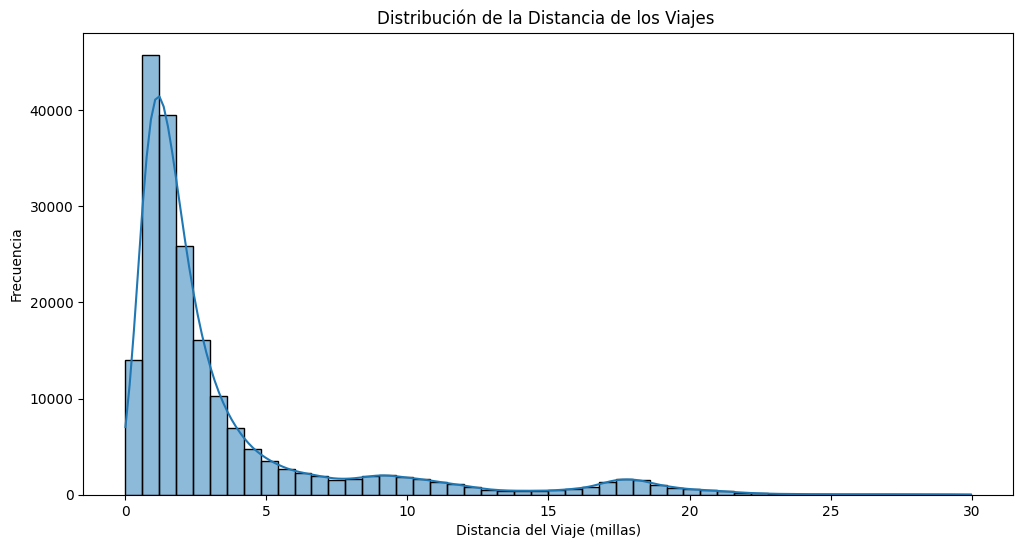

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(distancia['trip_distance'], bins=50, kde=True)  # Ajusta el número de bins si es necesario
plt.title('Distribución de la Distancia de los Viajes ')
plt.xlabel('Distancia del Viaje (millas)')
plt.ylabel('Frecuencia')
plt.show()

Se realizó un análisis estadístico sobre la distancia de viajes de taxis amarillos en la ciudad de Nueva York, utilizando una muestra aleatoria de 200,000 registros. Los resultados proporcionan una visión detallada de la distribución de las distancias de los viajes.

In [ ]:


# Calcular parámetros estadísticos
estadisticos_importantes = distancia['trip_distance'].describe()

# Imprimir los resultados
print(estadisticos_importantes)


count    200000.000000
mean          3.518613
std           4.435937
min           0.010000
25%           1.100000
50%           1.820000
75%           3.500000
max          29.970000
Name: trip_distance, dtype: float64


Estos resultados revelan una variabilidad significativa en las distancias de los viajes de taxis amarillos, con una media de aproximadamente 3.52 unidades de distancia. La desviación estándar de 4.44 indica la dispersión de los datos alrededor de la media. Además, los cuartiles proporcionan información sobre la distribución de las distancias en diferentes rangos.

## Tarifas de Taxi

In [ ]:
query4 = """
  SELECT
    EXTRACT(MONTH FROM tpep_pickup_datetime) AS mes,
    SUM(total_amount) AS suma_total_amount
  FROM
    `ultimate-realm-388922.taxis_nyc.yellow_tripdata`
  GROUP BY
    mes
  ORDER BY
    mes
"""



tarifa = client.query(query4).to_dataframe()

# Imprimir el DataFrame resultante
tarifa

,mes,suma_total_amount
0,1,8.344522e+07
1,2,7.894921e+07
2,3,9.533415e+07
3,4,9.367472e+07
4,5,1.025295e+08
5,6,9.651808e+07
6,7,8.382786e+07
7,8,8.164586e+07
8,9,8.517799e+07
9,10,1.036964e+08


In [ ]:
# Mapear los nombres de los meses
nombres_meses = {1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril', 5: 'mayo', 6: 'junio',
                 7: 'julio', 8: 'agosto', 9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'}

tarifa['nombre_mes'] = tarifa['mes'].map(nombres_meses)

# Eliminar la columna mes si no la necesitas
tarifa = tarifa.drop(columns=['mes'])

# Imprimir el DataFrame resultante
tarifa

,suma_total_amount,nombre_mes
0,8.344522e+07,enero
1,7.894921e+07,febrero
2,9.533415e+07,marzo
3,9.367472e+07,abril
4,1.025295e+08,mayo
5,9.651808e+07,junio
6,8.382786e+07,julio
7,8.164586e+07,agosto
8,8.517799e+07,septiembre
9,1.036964e+08,octubre


In [ ]:
# Crear una lista ordenada de los nombres de los meses
meses_ordenados = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

# Asignar un orden a los nombres de los meses
tarifa['nombre_mes'] = pd.Categorical(tarifa['nombre_mes'], categories=meses_ordenados, ordered=True)

# Ordenar el DataFrame por el nombre del mes
tarifa = tarifa.sort_values(by='nombre_mes')


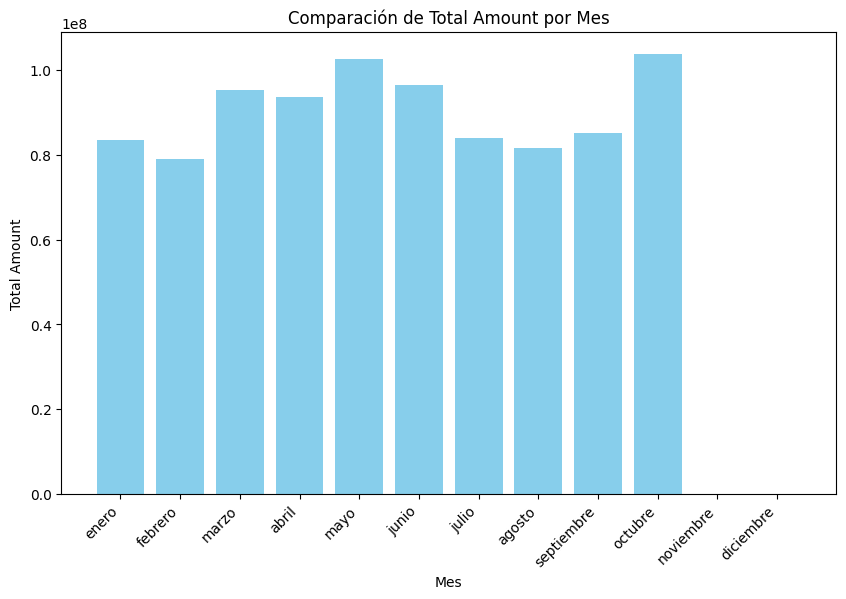

In [ ]:


# Ordenar el DataFrame por el número de mes
tarifa = tarifa.sort_values(by='nombre_mes')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tarifa['nombre_mes'], tarifa['suma_total_amount'], color='skyblue')
plt.title('Comparación de Total Amount por Mes')
plt.xlabel('Mes')
plt.ylabel('Total Amount')

# Rotar las etiquetas del eje x a 45 grados
plt.xticks(rotation=45, ha='right')

plt.show()


Los ingresos totales se encuentra entre 80.000.000 y 100.000.000 dolares por mes.

Descripción estadística de total_amount, que es la tarifa total cobrada al pasajero. Para evitar outlayers se pone un mínimo de 0.01 y un máximo de 400 dólares.

In [ ]:
query5 = """
  SELECT
  COUNT(total_amount) AS count,
  AVG(total_amount) AS mean,
  STDDEV(total_amount) AS std_dev,

FROM
    `ultimate-realm-388922.taxis_nyc.yellow_tripdata`
    WHERE
  total_amount BETWEEN 0.01 AND 400
"""

tarifa_descripcion = client.query(query5).to_dataframe()

# Imprimir el DataFrame resultante
tarifa_descripcion


,count,mean,std_dev
0,31282582,28.90572,22.681068


Del total de registros del año 2023 el promedio pagado por pasajero por viaje es de 28.9 dólares